# Импортируем необходимые библиотеки

In [363]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import seaborn as sns
import matplotlib.pyplot as plt
RANDOM_SEED = 42

# Откройте файл с данными

In [364]:
columns = ["calls",  "minutes",  "message","md_used", "is_ultra"]
df_tarific = pd.read_csv("users_behavior.csv",
                 names=columns,
                 header=1) 

In [365]:
df_tarific.head()

,calls,minutes,message,md_used,is_ultra
0,85.0,516.75,56.0,22696.96,0
1,77.0,467.66,86.0,21060.45,0
2,106.0,745.53,81.0,8437.39,1
3,66.0,418.74,1.0,14502.75,0
4,58.0,344.56,21.0,15823.37,0


In [366]:
df_tarific.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3213 entries, 0 to 3212
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3213 non-null   float64
 1   minutes   3213 non-null   float64
 2   message   3213 non-null   float64
 3   md_used   3213 non-null   float64
 4   is_ultra  3213 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.6 KB


In [367]:
df_tarific.describe()

,calls,minutes,message,md_used,is_ultra
count,3213.000000,3213.000000,3213.000000,3213.000000,3213.000000
mean,63.046063,438.248098,38.267351,17206.831089,0.306567
std,33.239054,234.595795,36.145338,7571.995923,0.461140
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.530000,9.000000,12491.750000,0.000000
50%,62.000000,430.700000,30.000000,16942.030000,0.000000
75%,82.000000,572.030000,57.000000,21425.840000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


Исследовательский анализ данных

<Axes: >

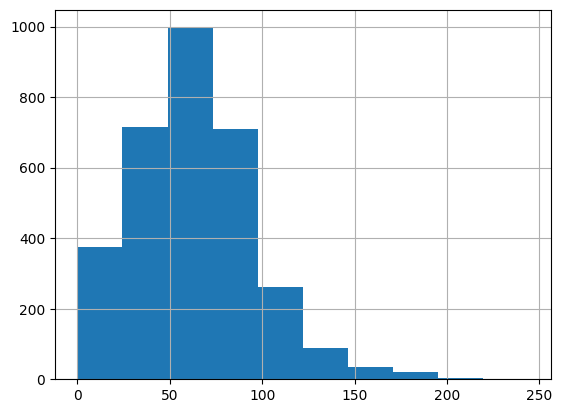

In [368]:
df_tarific['calls'].hist()

<Axes: >

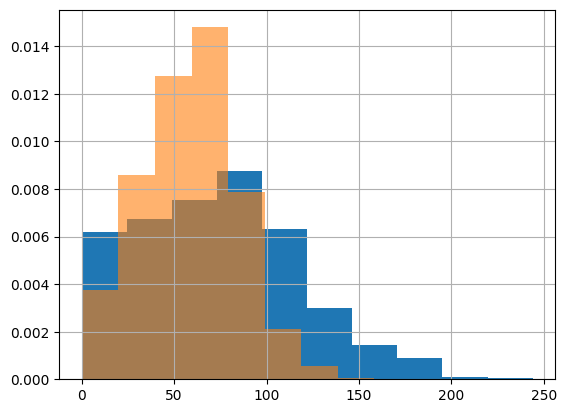

In [369]:
df_tarific.query('is_ultra == 1')['calls'].hist(density=True)
df_tarific.query('is_ultra == 0')['calls'].hist(alpha=0.6, density=True)

<Axes: >

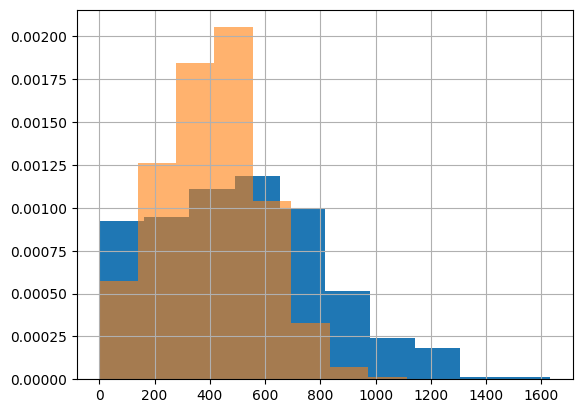

In [370]:
df_tarific.query('is_ultra == 1')['minutes'].hist(density=True)
df_tarific.query('is_ultra == 0')['minutes'].hist(alpha=0.6, density=True)

<Axes: >

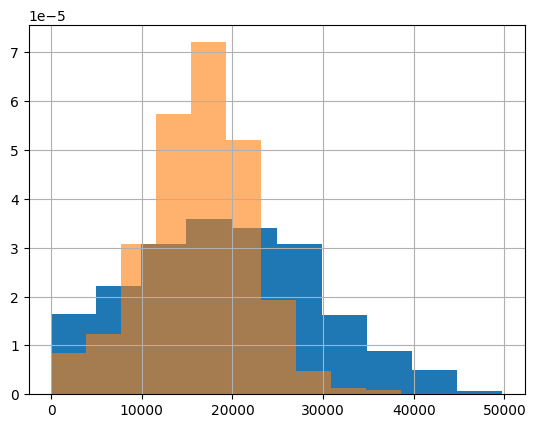

In [371]:
df_tarific.query('is_ultra == 1')['md_used'].hist(density=True)
df_tarific.query('is_ultra == 0')['md_used'].hist(alpha=0.6, density=True)

<Axes: >

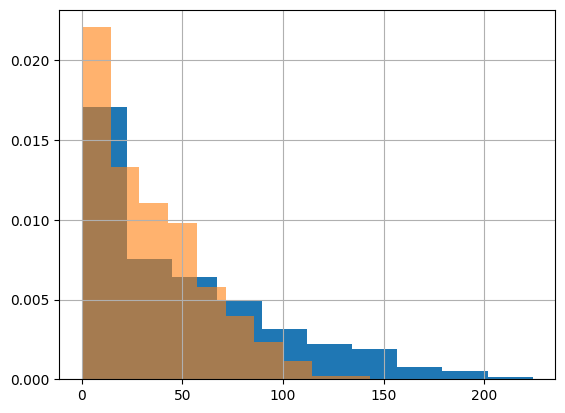

In [372]:
df_tarific.query('is_ultra == 1')['message'].hist(density=True)
df_tarific.query('is_ultra == 0')['message'].hist(alpha=0.6, density=True)

In [373]:
df_tarific.query('is_ultra == 1').describe()

,calls,minutes,message,md_used,is_ultra
count,985.000000,985.000000,985.000000,985.000000,985.0
mean,73.392893,511.224569,49.363452,19468.823228,1.0
std,43.916853,308.031100,47.804457,10087.178654,0.0
min,0.000000,0.000000,0.000000,0.000000,1.0
25%,41.000000,276.030000,6.000000,11770.280000,1.0
50%,74.000000,502.550000,38.000000,19308.010000,1.0
75%,104.000000,730.050000,79.000000,26837.720000,1.0
max,244.000000,1632.060000,224.000000,49745.730000,1.0


In [374]:
df_tarific.query('is_ultra == 0').describe()

,calls,minutes,message,md_used,is_ultra
count,2228.000000,2228.000000,2228.000000,2228.000000,2228.0
mean,58.471724,405.985162,33.361759,16206.803146,0.0
std,25.942730,184.543262,28.214621,5871.291048,0.0
min,0.000000,0.000000,0.000000,0.000000,0.0
25%,40.000000,274.130000,10.000000,12638.732500,0.0
50%,60.000000,410.605000,28.000000,16505.565000,0.0
75%,76.000000,529.515000,51.000000,20043.907500,0.0
max,198.000000,1390.220000,143.000000,38552.620000,0.0


<Axes: >

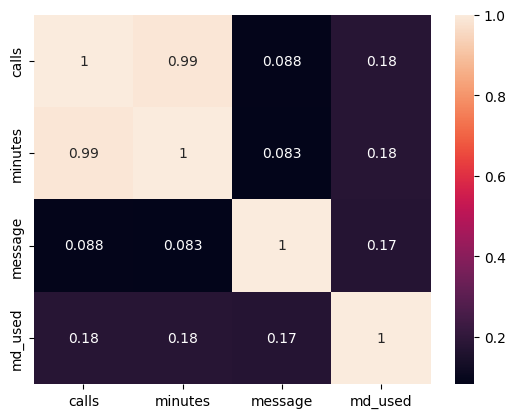

In [375]:
sns.heatmap(df_tarific.query('is_ultra == 1').drop('is_ultra', axis=1).corr(), annot=True)

<Axes: >

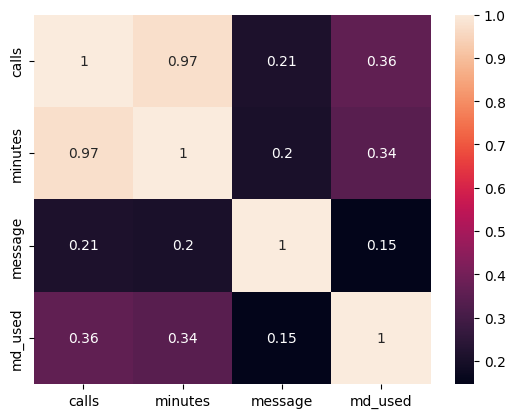

In [376]:
sns.heatmap(df_tarific.query('is_ultra == 0').drop('is_ultra', axis=1).corr(), annot=True)

# Разобьем данные на выборки

In [377]:
X = df_tarific.drop(columns=['is_ultra']) 
Y = df_tarific['is_ultra']

In [378]:
X_train, X_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.33, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

#  Исследуем модели

# Random Forest

In [379]:
best_RF = None
best_accuracy_RF = 0
best_est_RF = 0
best_depth_RF = 0

In [380]:
for est in range(2, 51):
    for depth in range(2, 25):
        
        RF = RandomForestClassifier(random_state = RANDOM_SEED, n_estimators = est, max_depth = depth)
        RF.fit(X_train, y_train)
        
        prediction_valid_RF = RF.predict(X_valid)
        accuracy_RF = accuracy_score(prediction_valid_RF, y_valid)

        if best_accuracy_RF < accuracy_RF:
            best_RF = RF
            best_depth_RF = depth
            best_est_RF = est
            best_accuracy_RF = accuracy_RF

Вывод

accuracy

In [381]:
print(f"Random Forest valid: {best_accuracy_RF}")

Random Forest valid: 0.8150943396226416


In [382]:
prediction_test_RF = best_RF.predict(X_test)

In [383]:
accuracy_RF_test = accuracy_score(prediction_test_RF, y_test)
print(f"Random Forest test: {accuracy_RF_test}")

Random Forest test: 0.7815442561205274


f1_score

In [384]:
f1_score(prediction_valid_RF, y_valid, average='weighted')

0.7946957081566054

In [385]:
f1_score(prediction_test_RF, y_test, average='weighted')

0.785848298428943

# Decision Tree

In [386]:
best_DT = None
best_accuracy_DT = 0
best_depth_DT = 0

In [387]:
for depth in range(2,5):
    DT = DecisionTreeClassifier(random_state = RANDOM_SEED, max_depth = depth)
    DT = DT.fit(X_train, y_train)
    prediction_valid_DT = DT.predict(X_valid)
    accuracy_DT = accuracy_score(prediction_valid_DT, y_valid)
    if best_accuracy_DT < accuracy_DT:
        best_DT = DT
        best_accuracy_DT = accuracy_DT
        best_depth_DT = depth

Вывод 

In [388]:
from sklearn import tree

[Text(0.5, 0.9, 'x[3] <= 25082.575\ngini = 0.427\nsamples = 2152\nvalue = [1487, 665]'),
 Text(0.25, 0.7, 'x[0] <= 99.5\ngini = 0.369\nsamples = 1871\nvalue = [1415, 456]'),
 Text(0.125, 0.5, 'x[2] <= 114.5\ngini = 0.319\nsamples = 1704\nvalue = [1364, 340]'),
 Text(0.0625, 0.3, 'x[1] <= 0.735\ngini = 0.301\nsamples = 1665\nvalue = [1358, 307]'),
 Text(0.03125, 0.1, 'gini = 0.172\nsamples = 21\nvalue = [2, 19]'),
 Text(0.09375, 0.1, 'gini = 0.289\nsamples = 1644\nvalue = [1356, 288]'),
 Text(0.1875, 0.3, 'x[2] <= 129.5\ngini = 0.26\nsamples = 39\nvalue = [6, 33]'),
 Text(0.15625, 0.1, 'gini = 0.457\nsamples = 17\nvalue = [6, 11]'),
 Text(0.21875, 0.1, 'gini = 0.0\nsamples = 22\nvalue = [0, 22]'),
 Text(0.375, 0.5, 'x[0] <= 110.5\ngini = 0.424\nsamples = 167\nvalue = [51, 116]'),
 Text(0.3125, 0.3, 'x[2] <= 10.5\ngini = 0.498\nsamples = 70\nvalue = [33, 37]'),
 Text(0.28125, 0.1, 'gini = 0.351\nsamples = 22\nvalue = [5, 17]'),
 Text(0.34375, 0.1, 'gini = 0.486\nsamples = 48\nvalue = [28

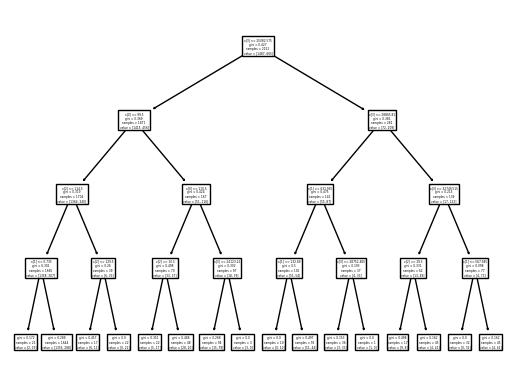

In [389]:
tree.plot_tree(DT)

accuracy

In [390]:
print(f"Decision Tree valid: {best_accuracy_DT}")

Decision Tree valid: 0.7867924528301887


In [391]:
prediction_test_DT = best_DT.predict(X_test)

In [392]:
accuracy_DT_test = accuracy_score(prediction_test_DT, y_test)
print(f"Decision Tree test: {accuracy_DT_test}")

Decision Tree test: 0.7721280602636534


f1_score

In [393]:
f1_score(prediction_valid_DT, y_valid, average='weighted')

0.8111394401730758

In [394]:
f1_score(prediction_test_DT, y_test, average='weighted')

0.7968820583171268

# LogisticRegression

In [395]:
LR = LogisticRegression(random_state = RANDOM_SEED, max_iter= 1000, tol=1e-5, solver = 'lbfgs')
LR.fit(X_train, y_train)
prediction_valid_LR = LR.predict(X_valid)
accuracy_LR = accuracy_score(prediction_valid_LR, y_valid)

Вывод

accuracy

In [396]:
print(f"Logistic Regression valid: {accuracy_LR}")

Logistic Regression valid: 0.7433962264150943


In [397]:
prediction_test_LR = LR.predict(X_test)

In [398]:
accuracy_LR_test = accuracy_score(prediction_test_LR, y_test)

In [399]:
print(f"Logistic Regression  test: {accuracy_LR_test}")

Logistic Regression  test: 0.7476459510357816


f1_score

In [400]:
f1_score(prediction_valid_LR, y_valid, average='weighted')

0.7987571180920704

In [401]:
f1_score(prediction_test_LR, y_test, average='weighted')

0.7917084610751828